In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [3]:
titanic_data = pd.read_csv('titanic.csv')

titanic_info = titanic_data.info()
titanic_description = titanic_data.describe(include='all')

customer_support_data = pd.read_csv('Customer_support_data.csv')

customer_support_info = customer_support_data.info()
customer_support_description = customer_support_data.describe(include='all')

titanic_info, titanic_description, customer_support_info, customer_support_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    object 
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   ---------

(None,
         Unnamed: 0  PassengerId    Survived Pclass                     Name  \
 count   891.000000   891.000000  891.000000    891                      891   
 unique         NaN          NaN         NaN      3                      891   
 top            NaN          NaN         NaN  third  Braund, Mr. Owen Harris   
 freq           NaN          NaN         NaN    491                        1   
 mean    445.000000   446.000000    0.383838    NaN                      NaN   
 std     257.353842   257.353842    0.486592    NaN                      NaN   
 min       0.000000     1.000000    0.000000    NaN                      NaN   
 25%     222.500000   223.500000    0.000000    NaN                      NaN   
 50%     445.000000   446.000000    0.000000    NaN                      NaN   
 75%     667.500000   668.500000    1.000000    NaN                      NaN   
 max     890.000000   891.000000    1.000000    NaN                      NaN   
 
          Sex         Age      

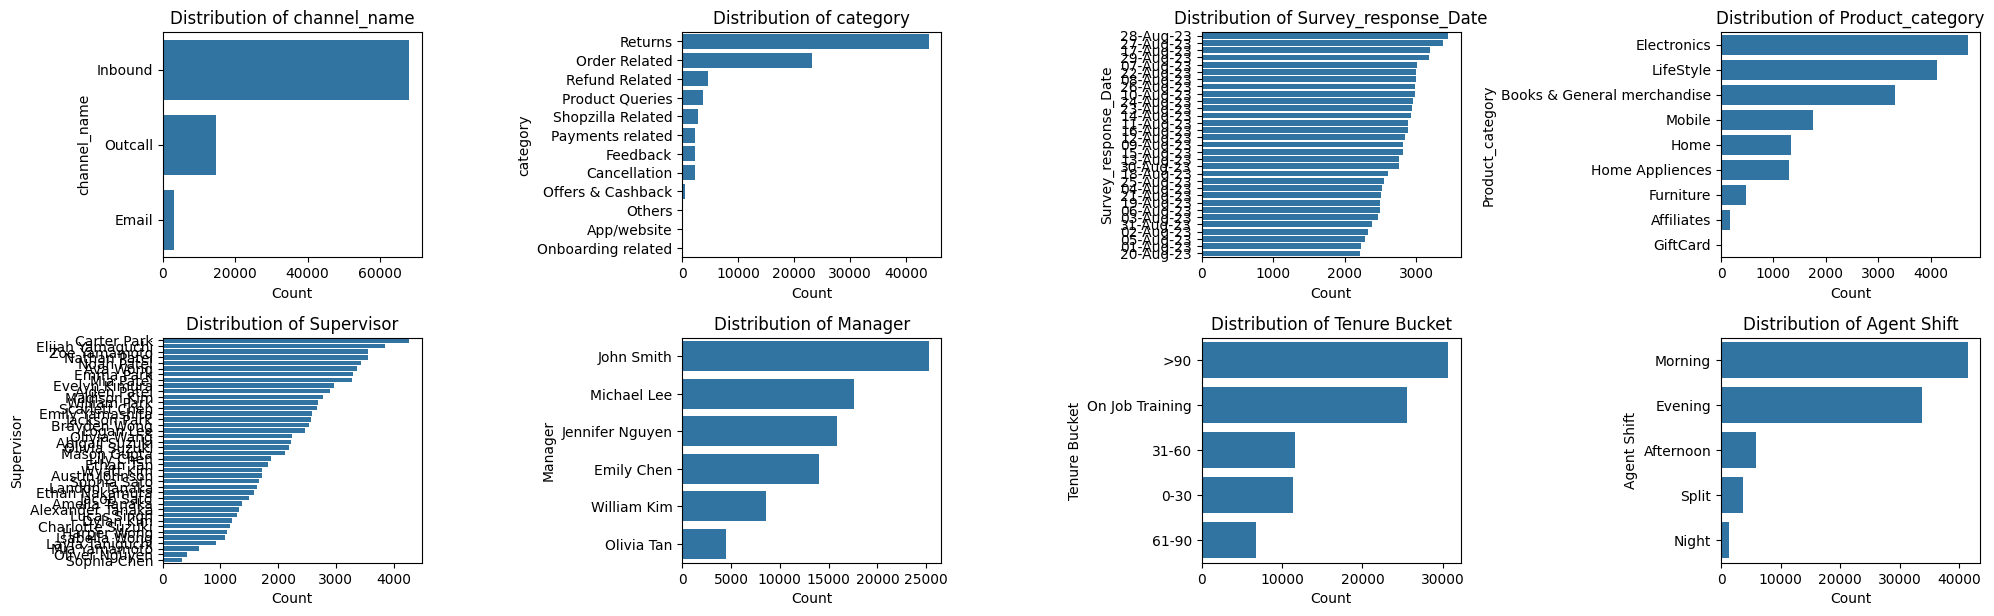

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Определение категориальных признаков и их количества уникальных значений
categorical_columns = customer_support_data.select_dtypes(include=['object']).columns
unique_values = {col: customer_support_data[col].nunique() for col in categorical_columns}

# Функция для создания бар-графиков для категориальных признаков
def plot_categorical_distribution(data, columns):
    plt.figure(figsize=(20, 15))
    for i, col in enumerate(columns, 1):
        plt.subplot(5, 4, i)
        sns.countplot(data=data, y=col, order=data[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# Фильтрация признаков с небольшим количеством уникальных значений (менее 50)
columns_to_plot = [col for col, unique in unique_values.items() if unique < 50]

plot_categorical_distribution(customer_support_data, columns_to_plot)


In [5]:
from sklearn.preprocessing import LabelEncoder

# Преобразование категориальных признаков в числовые
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    customer_support_data[column] = le.fit_transform(customer_support_data[column].astype(str))
    label_encoders[column] = le

# Проверка преобразованных данных
customer_support_data.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,42694,2,8,19,17763,51500,13766,276,306,0,1782,9,NaN,NaN,1072,26,1,4,2,5
1,59407,2,8,34,17763,56068,13766,368,367,0,1782,9,NaN,NaN,1323,9,3,3,2,5
2,10706,1,5,15,17763,51493,13766,771,782,0,1782,9,NaN,NaN,370,18,5,4,1,5
3,78950,1,10,40,17763,24227,13766,810,816,0,1782,9,NaN,NaN,1024,33,2,3,1,5
4,62788,1,1,22,17763,61514,13766,236,240,0,1782,9,NaN,NaN,247,4,3,0,2,5


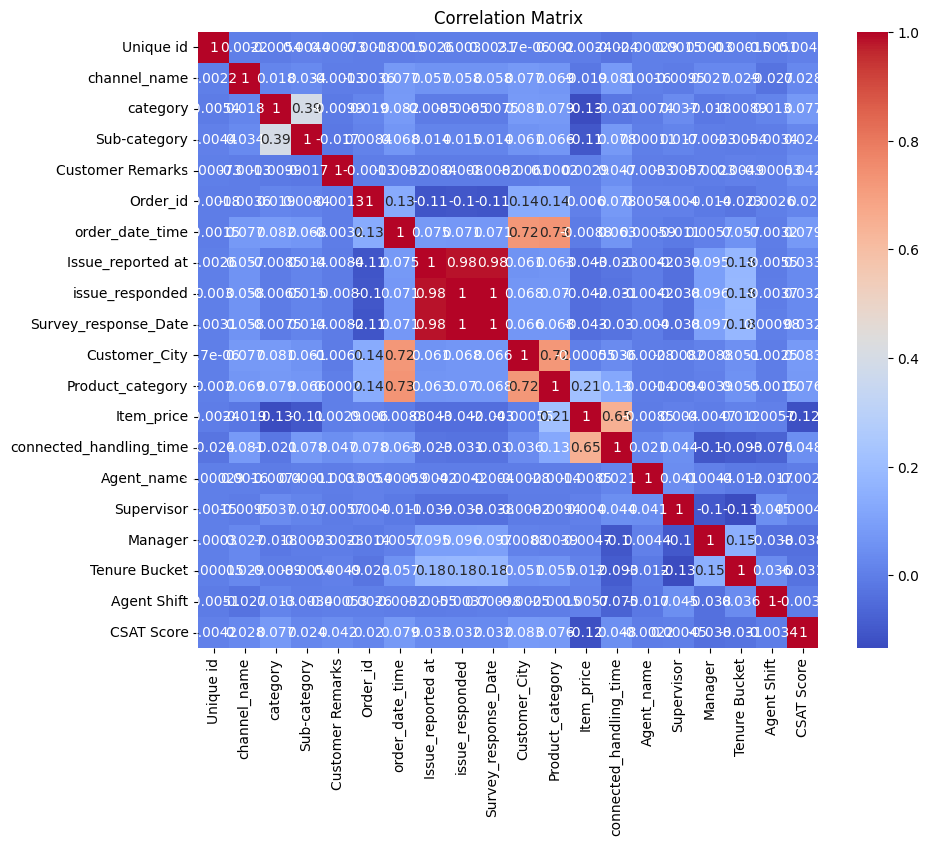

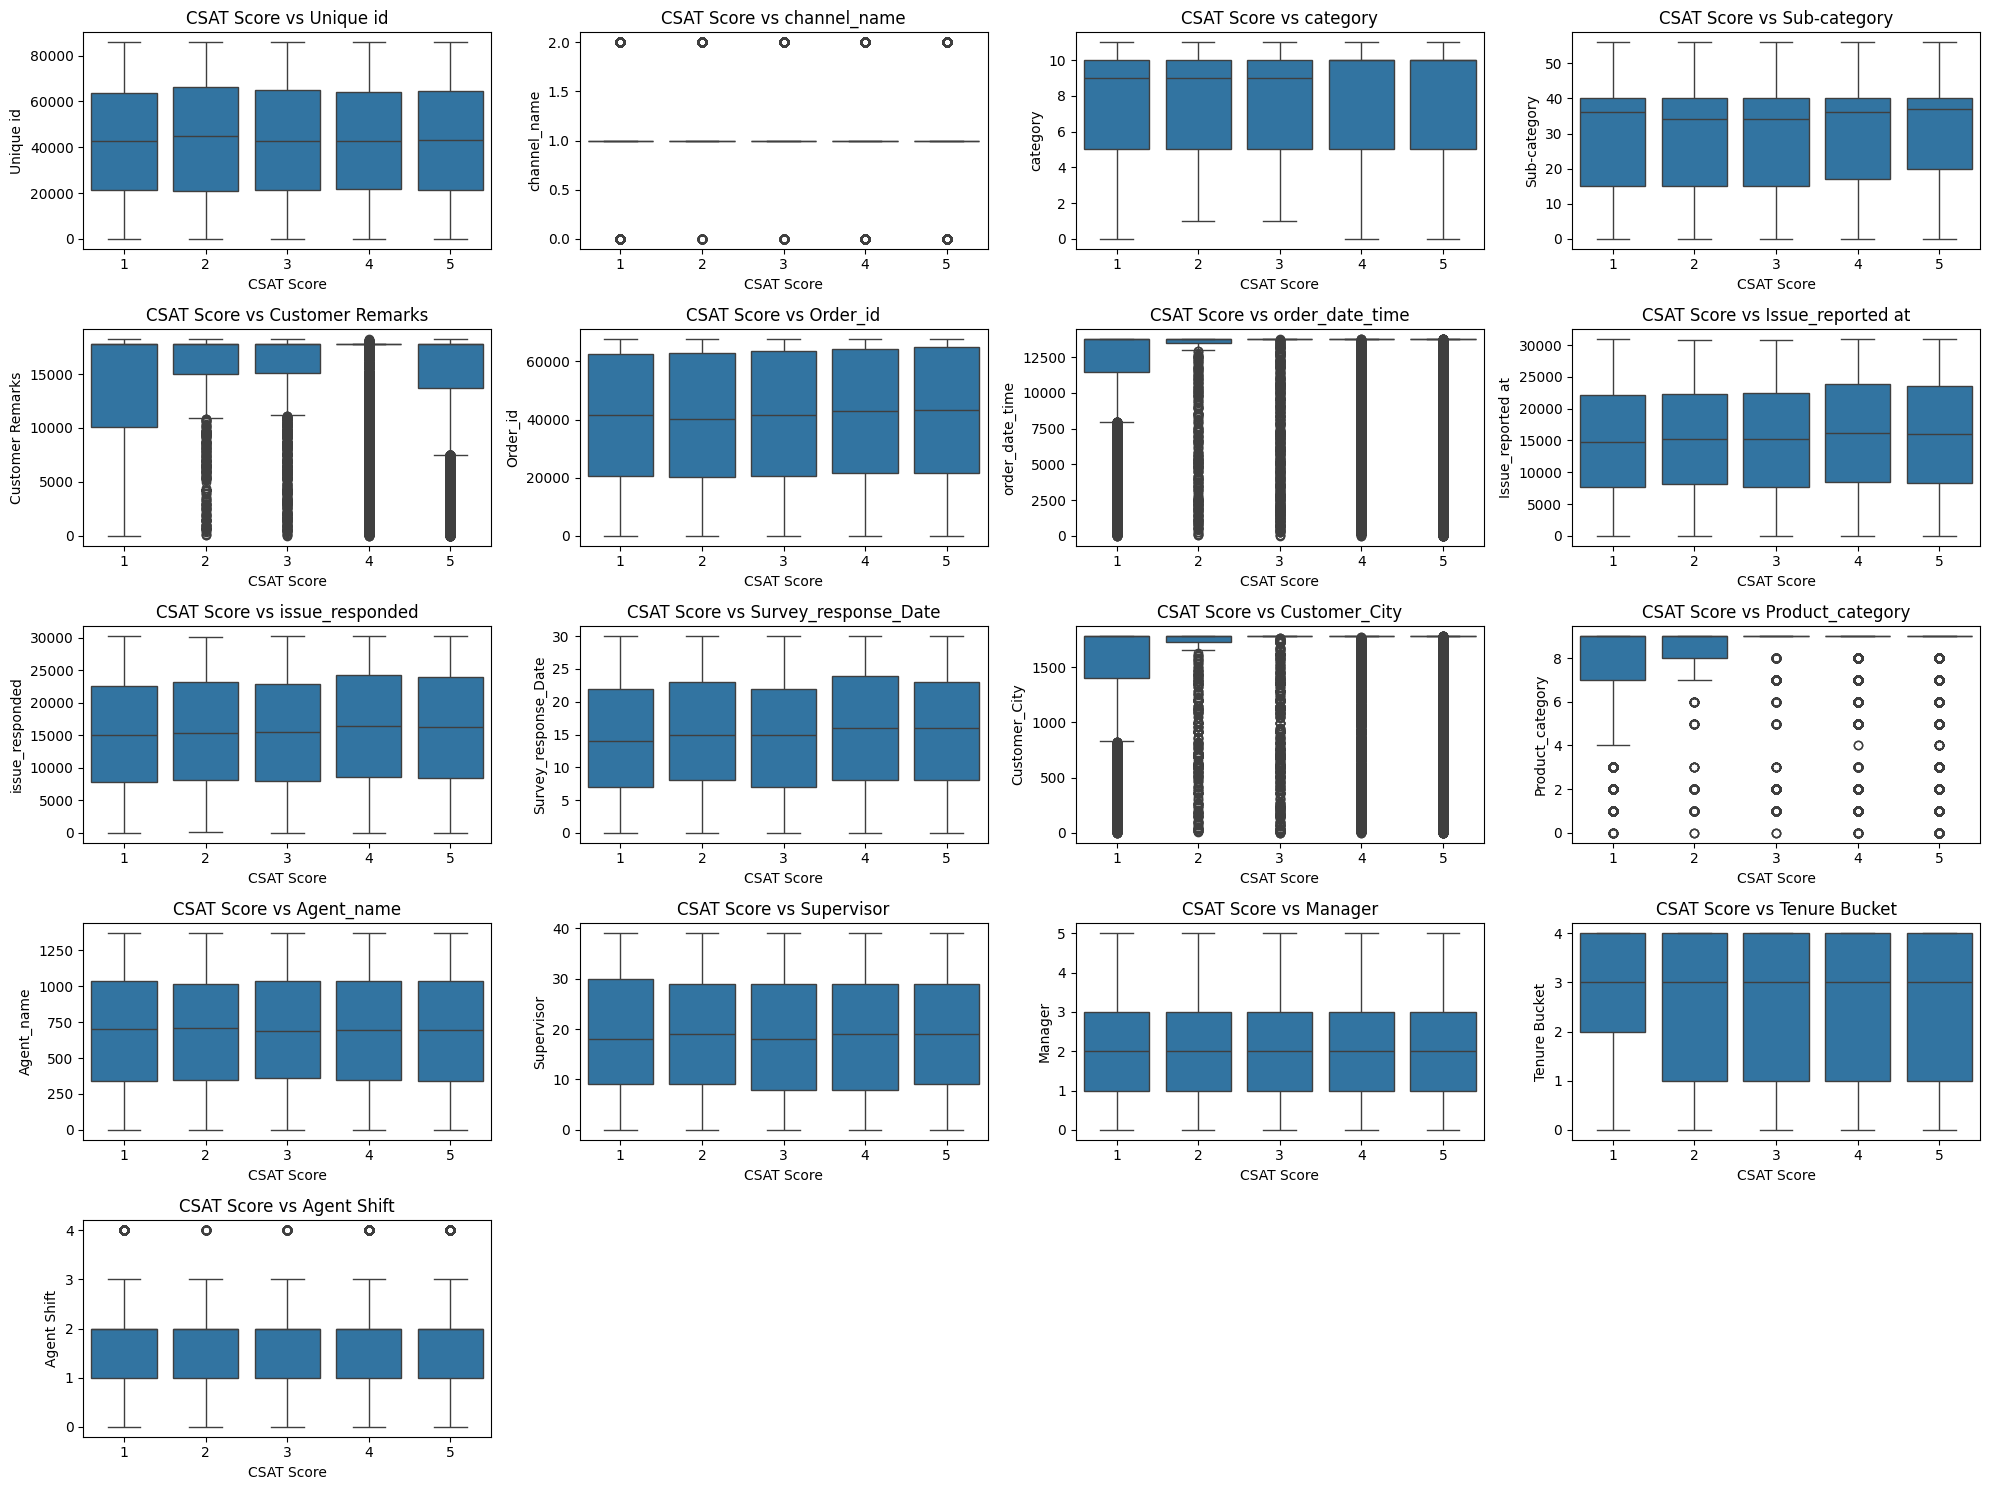

CSAT Score                 1.000000
Customer_City              0.083098
order_date_time            0.078689
category                   0.077319
Product_category           0.076064
connected_handling_time    0.047526
Customer Remarks           0.042463
Issue_reported at          0.032661
Survey_response_Date       0.031629
issue_responded            0.031588
channel_name               0.028143
Sub-category               0.024257
Order_id                   0.019935
Unique id                  0.004200
Supervisor                 0.000448
Agent_name                -0.002239
Agent Shift               -0.003361
Tenure Bucket             -0.030608
Manager                   -0.037504
Item_price                -0.123320
Name: CSAT Score, dtype: float64

In [6]:
# Расчет корреляции
correlation_matrix = customer_support_data.corr()

# Выбор корреляции с целевой переменной CSAT Score
csat_corr = correlation_matrix["CSAT Score"].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(data=customer_support_data, y=col, x="CSAT Score")
    plt.title(f'CSAT Score vs {col}')
plt.tight_layout()
plt.show()

csat_corr

In [7]:
# Укрупнение категорий для channel_name
customer_support_data['channel_name'] = customer_support_data['channel_name'].replace(
    customer_support_data['channel_name'].value_counts()[customer_support_data['channel_name'].value_counts() < 1000].index, 'Other')

# Укрупнение категорий для category
customer_support_data['category'] = customer_support_data['category'].replace(
    customer_support_data['category'].value_counts()[customer_support_data['category'].value_counts() < 1000].index, 'Other')

# Укрупнение категорий для Sub-category
customer_support_data['Sub-category'] = customer_support_data['Sub-category'].replace(
    customer_support_data['Sub-category'].value_counts()[customer_support_data['Sub-category'].value_counts() < 1000].index, 'Other')

# Укрупнение категорий для Product_category
customer_support_data['Product_category'] = customer_support_data['Product_category'].replace(
    customer_support_data['Product_category'].value_counts()[customer_support_data['Product_category'].value_counts() < 1000].index, 'Other')

# Укрупнение категорий для Tenure Bucket
customer_support_data['Tenure Bucket'] = customer_support_data['Tenure Bucket'].replace(
    customer_support_data['Tenure Bucket'].value_counts()[customer_support_data['Tenure Bucket'].value_counts() < 1000].index, 'Other')

# Укрупнение категорий для Agent Shift
customer_support_data['Agent Shift'] = customer_support_data['Agent Shift'].replace(
    customer_support_data['Agent Shift'].value_counts()[customer_support_data['Agent Shift'].value_counts() < 1000].index, 'Other')

# Проверка укрупнения
customer_support_data[categorical_columns].apply(pd.Series.nunique)

Unique id               85907
channel_name                3
category                    9
Sub-category               19
Customer Remarks        18232
Order_id                67676
order_date_time         13767
Issue_reported at       30923
issue_responded         30262
Survey_response_Date       31
Customer_City            1783
Product_category            8
Agent_name               1371
Supervisor                 40
Manager                     6
Tenure Bucket               5
Agent Shift                 5
dtype: int64

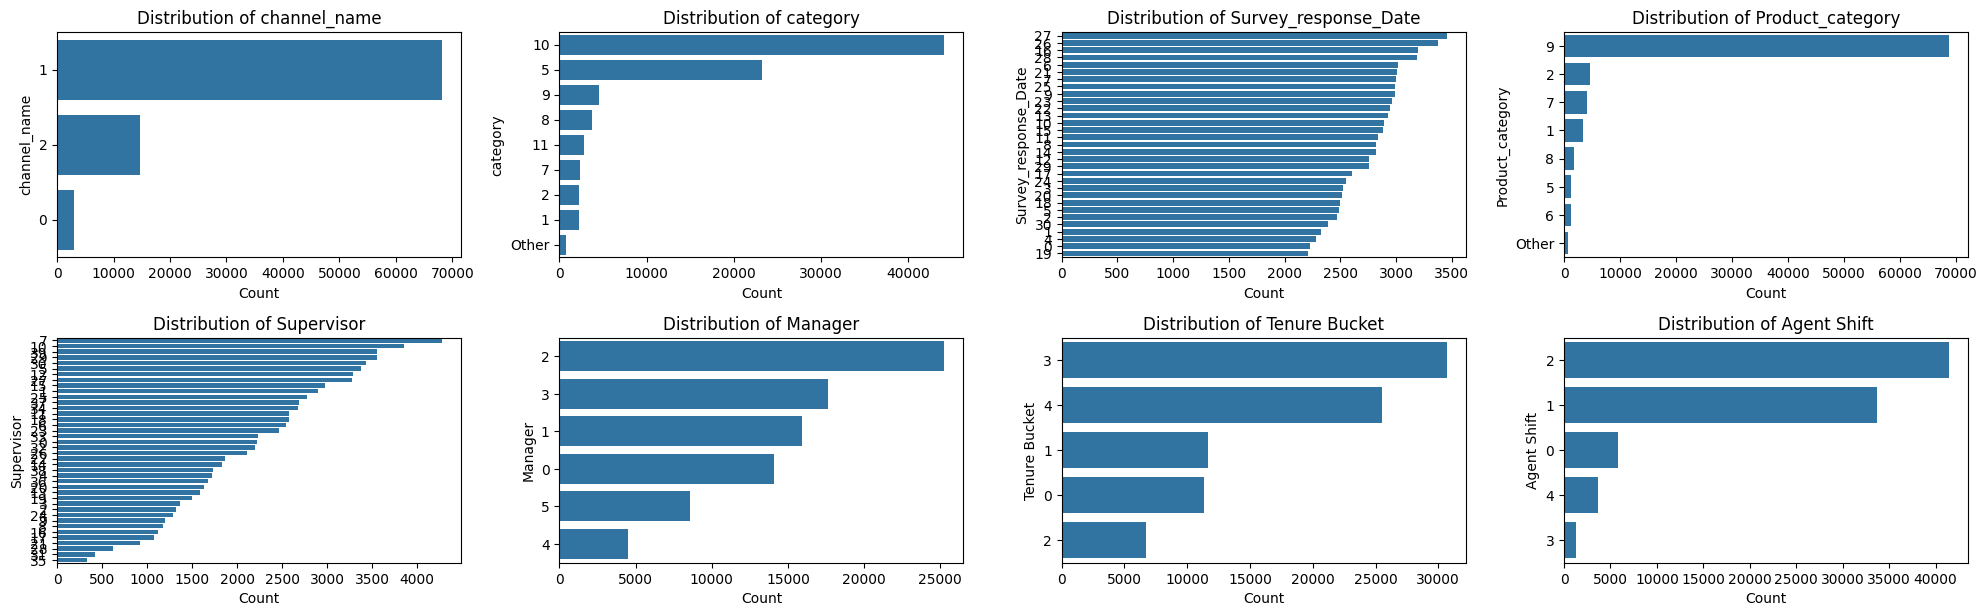

In [8]:
plot_categorical_distribution(customer_support_data, columns_to_plot)


In [9]:
# Рассчет средней оценки CSAT Score для каждого агента
agent_csat_mean = customer_support_data.groupby('Agent_name')['CSAT Score'].mean().reset_index()
agent_csat_mean.columns = ['Agent_name', 'Agent_CSAT_Mean']

# Добавление нового столбца к основному датасету
customer_support_data = customer_support_data.merge(agent_csat_mean, on='Agent_name', how='left')

# Проверка добавленного столбца
customer_support_data.head()


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,...,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Agent_CSAT_Mean
0,42694,2,8,Other,17763,51500,13766,276,306,0,...,9,NaN,NaN,1072,26,1,4,2,5,4.285714
1,59407,2,8,34,17763,56068,13766,368,367,0,...,9,NaN,NaN,1323,9,3,3,2,5,4.593750
2,10706,1,5,15,17763,51493,13766,771,782,0,...,9,NaN,NaN,370,18,5,4,1,5,4.514286
3,78950,1,10,40,17763,24227,13766,810,816,0,...,9,NaN,NaN,1024,33,2,3,1,5,3.979167
4,62788,1,1,22,17763,61514,13766,236,240,0,...,9,NaN,NaN,247,4,3,0,2,5,4.032258


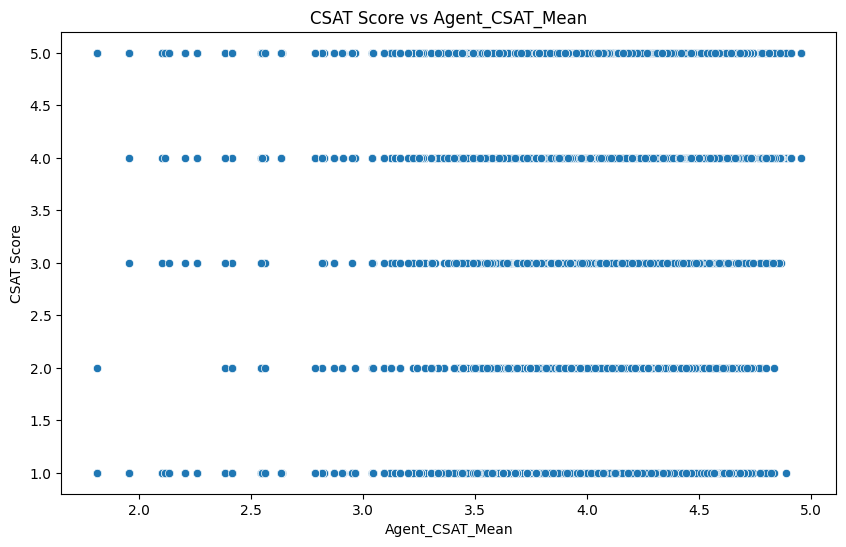

,CSAT Score,Agent_CSAT_Mean
CSAT Score,1.000000,0.247243
Agent_CSAT_Mean,0.247243,1.000000


In [10]:
# Проверка корреляции нового столбца с целевой переменной
new_corr = customer_support_data[['CSAT Score', 'Agent_CSAT_Mean']].corr()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_support_data, x='Agent_CSAT_Mean', y='CSAT Score')
plt.title('CSAT Score vs Agent_CSAT_Mean')
plt.xlabel('Agent_CSAT_Mean')
plt.ylabel('CSAT Score')
plt.show()

new_corr

In [11]:
# Заполнение числовых признаков средним значением
customer_support_data['Item_price'].fillna(customer_support_data['Item_price'].mean(), inplace=True)
customer_support_data['connected_handling_time'].fillna(customer_support_data['connected_handling_time'].mean(), inplace=True)

# Заполнение временных меток специальным значением (например, 0 или 'missing')
customer_support_data['order_date_time'].fillna('missing', inplace=True)
customer_support_data['Issue_reported at'].fillna('missing', inplace=True)
customer_support_data['issue_responded'].fillna('missing', inplace=True)
customer_support_data['Survey_response_Date'].fillna('missing', inplace=True)

# Заполнение категориальных признаков наиболее часто встречающимся значением
categorical_cols = customer_support_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    customer_support_data[col].fillna(customer_support_data[col].mode()[0], inplace=True)

# Проверка на пропущенные значения
missing_values_after = customer_support_data.isnull().sum()

missing_values_after

Unique id                  0
channel_name               0
category                   0
Sub-category               0
Customer Remarks           0
Order_id                   0
order_date_time            0
Issue_reported at          0
issue_responded            0
Survey_response_Date       0
Customer_City              0
Product_category           0
Item_price                 0
connected_handling_time    0
Agent_name                 0
Supervisor                 0
Manager                    0
Tenure Bucket              0
Agent Shift                0
CSAT Score                 0
Agent_CSAT_Mean            0
dtype: int64

In [12]:
titanic_data = pd.read_csv('titanic.csv')

# Заполнение пропущенных значений в категориальных переменных
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# One-Hot Encoding для переменных Sex и Embarked
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

# Label Encoding для переменной Pclass
titanic_data['Pclass'] = titanic_data['Pclass'].astype('category')
titanic_data['Pclass'] = titanic_data['Pclass'].cat.codes

titanic_data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,0,1,0,2,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True
1,1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
2,2,3,1,2,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
4,4,5,0,2,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True


In [13]:
customer_support_data = pd.read_csv('Customer_support_data.csv')

columns_to_drop = [
    'Unique id', 'Customer Remarks', 'Order_id', 'order_date_time',
    'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City'
]

customer_support_data.drop(columns=columns_to_drop, inplace=True)

# Заполнение пропущенных значений в оставшихся категориальных переменных
categorical_cols = customer_support_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    customer_support_data[col].fillna(customer_support_data[col].mode()[0], inplace=True)

# Преобразование категориальных переменных с помощью get_dummies()
customer_support_data = pd.get_dummies(customer_support_data, drop_first=True)

customer_support_data.head()

,Item_price,connected_handling_time,CSAT Score,channel_name_Inbound,channel_name_Outcall,category_Cancellation,category_Feedback,category_Offers & Cashback,category_Onboarding related,category_Order Related,...,Manager_Olivia Tan,Manager_William Kim,Tenure Bucket_31-60,Tenure Bucket_61-90,Tenure Bucket_>90,Tenure Bucket_On Job Training,Agent Shift_Evening,Agent Shift_Morning,Agent Shift_Night,Agent Shift_Split
0,NaN,NaN,5,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,NaN,NaN,5,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
2,NaN,NaN,5,True,False,False,False,False,False,True,...,False,True,False,False,False,True,True,False,False,False
3,NaN,NaN,5,True,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
4,NaN,NaN,5,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


1. Постройте визуализацию распределения признаков и совместного распределения признаков и целевой переменной с помощью тепловых карт. Попробуйте использовать другие инструменты визуализации.

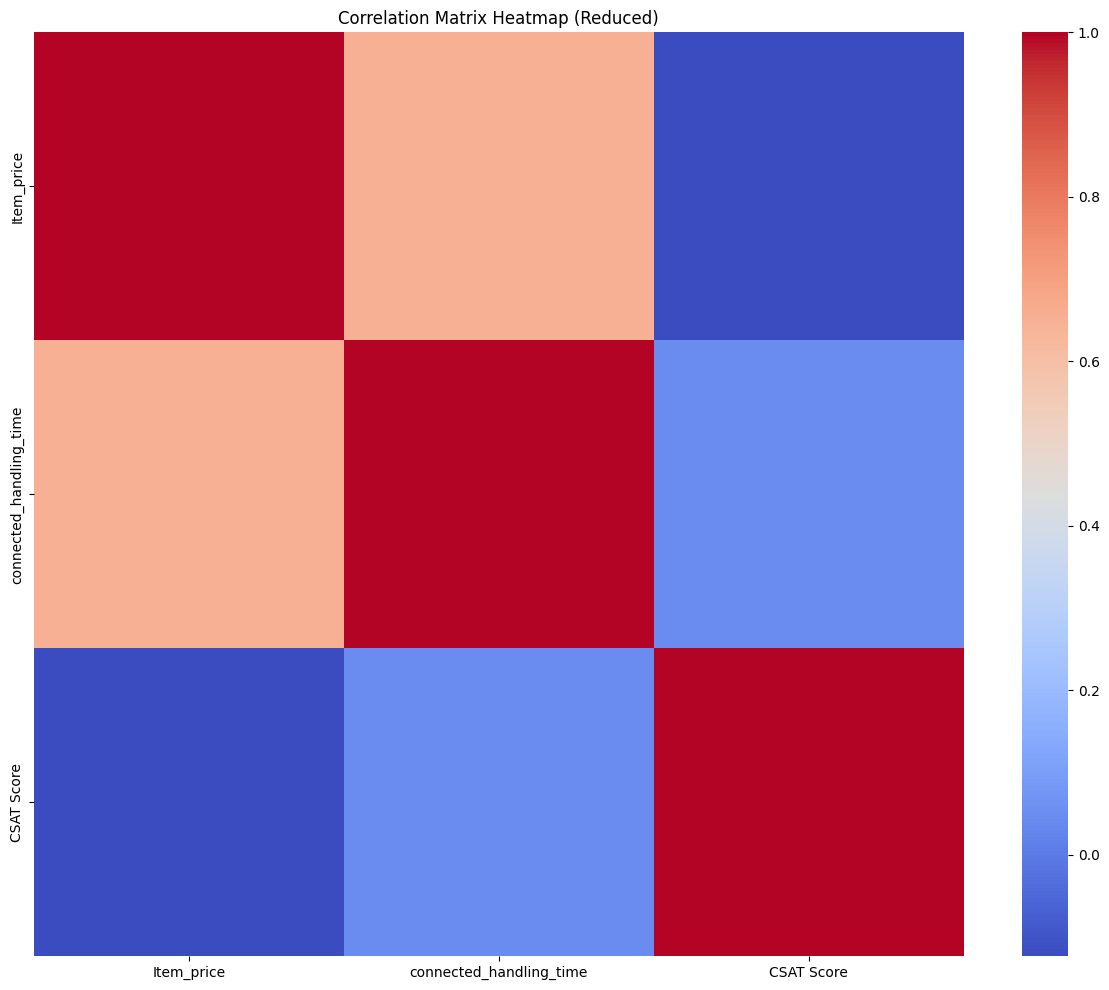

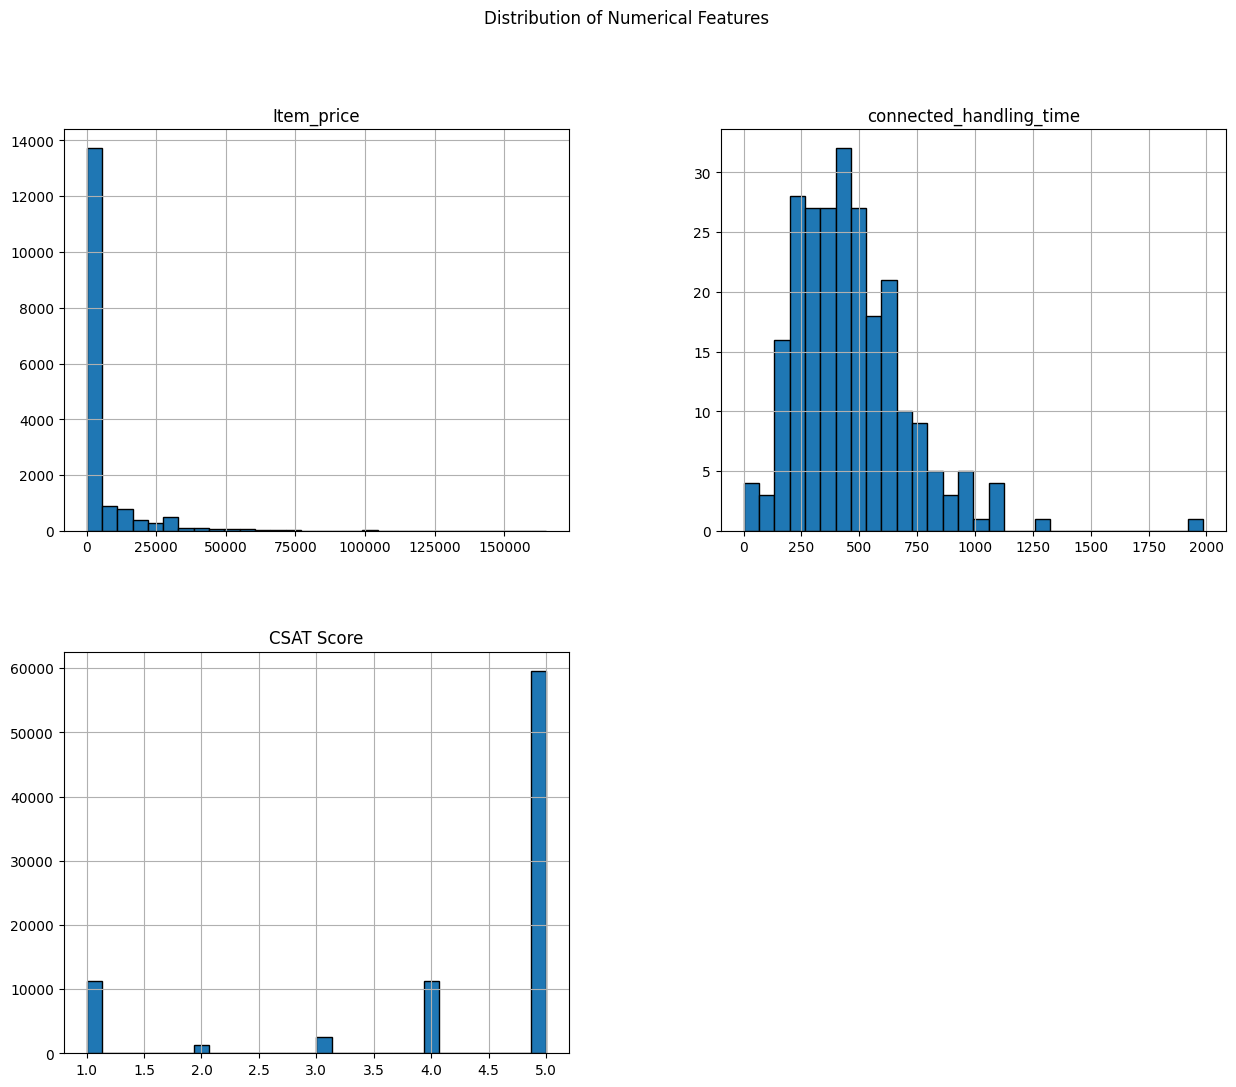

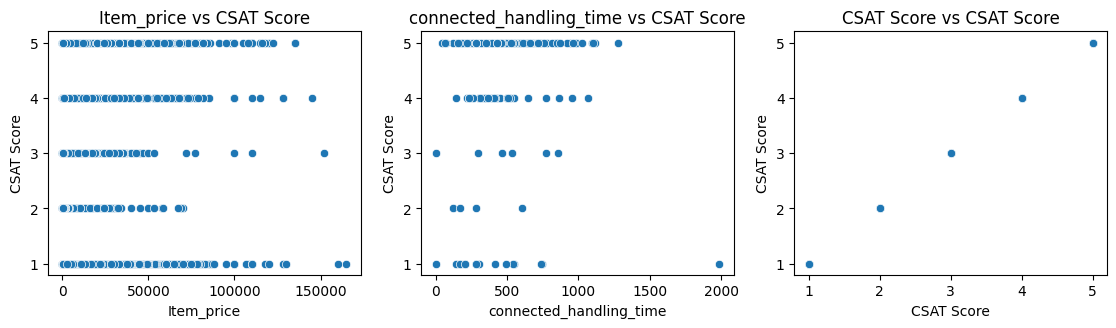

In [14]:
customer_support_data = pd.read_csv('Customer_support_data.csv')

columns_to_drop = [
    'Unique id', 'Customer Remarks', 'Order_id', 'order_date_time',
    'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City'
]

customer_support_data.drop(columns=columns_to_drop, inplace=True)

# Заполнение пропущенных значений
categorical_cols = customer_support_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    customer_support_data[col].fillna(customer_support_data[col].mode()[0], inplace=True)

# Преобразование категориальных переменных
customer_support_data = pd.get_dummies(customer_support_data, drop_first=True)

# Выбор числовых признаков
numeric_cols = customer_support_data.select_dtypes(include=['float64', 'int64']).columns

# Выбор первых 10 категориальных признаков для сокращения объема данных
categorical_dummy_cols = customer_support_data.select_dtypes(include=['uint8']).columns[:10]

# Создание сокращенного датасета
reduced_data = customer_support_data[list(numeric_cols) + list(categorical_dummy_cols)]

# Расчет корреляции для сокращенного набора данных
corr_matrix_reduced = reduced_data.corr()

# Построение тепловой карты
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix_reduced, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap (Reduced)')
plt.show()

# Построение гистограмм для числовых признаков
reduced_data[numeric_cols].hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Визуализация совместного распределения признаков и целевой переменной
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.scatterplot(data=reduced_data, x=col, y='CSAT Score')
    plt.title(f'{col} vs CSAT Score')
plt.tight_layout()
plt.show()

2. Постройте на получившимся датасете Customer support модель дерева решений и проанализируйте важность признаков. Сделайте вывод об адекватности наших предположений.


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

Mean Squared Error: 2.710869184374861
R^2 Score: -0.4349058106022754


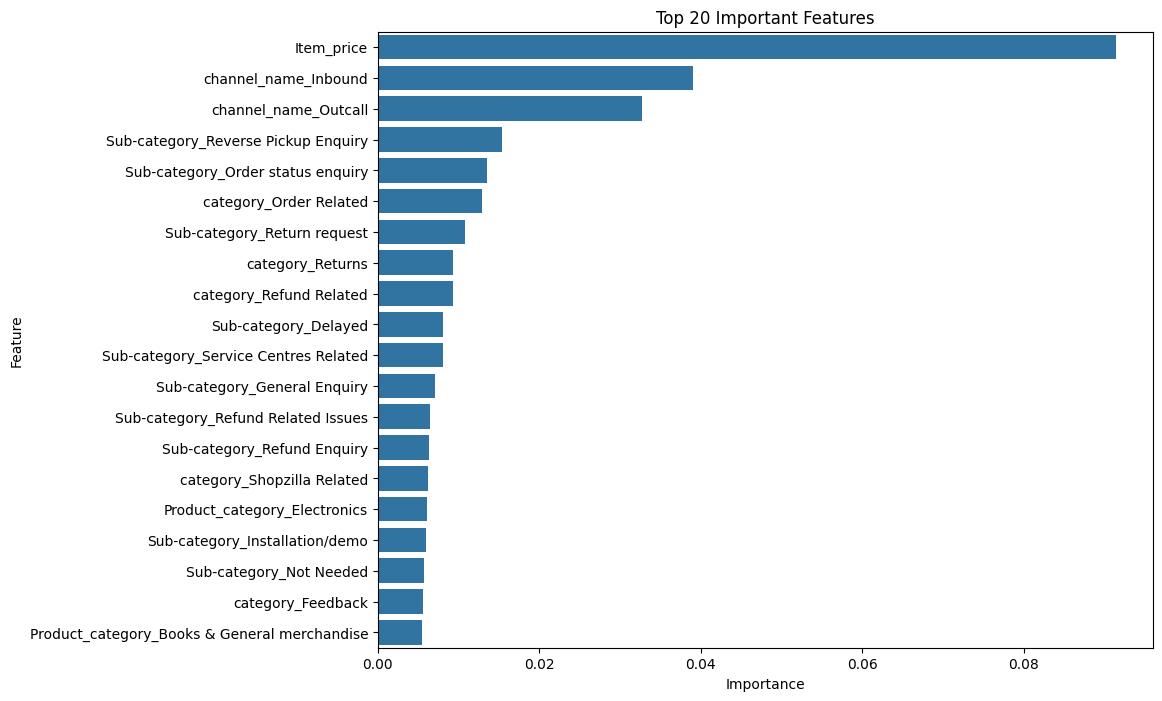

In [16]:
# Загрузка данных Customer Support
customer_support_data = pd.read_csv('Customer_support_data.csv')

# Удаление лишних столбцов
columns_to_drop = [
    'Unique id', 'Customer Remarks', 'Order_id', 'order_date_time',
    'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City'
]

customer_support_data.drop(columns=columns_to_drop, inplace=True)

# Заполнение пропущенных значений
for col in customer_support_data.select_dtypes(include=['object']).columns:
    customer_support_data[col].fillna(customer_support_data[col].mode()[0], inplace=True)

for col in customer_support_data.select_dtypes(include=['float64', 'int64']).columns:
    customer_support_data[col].fillna(customer_support_data[col].mean(), inplace=True)

# Преобразование категориальных переменных
customer_support_data = pd.get_dummies(customer_support_data, drop_first=True)

# Разделение данных на признаки и целевую переменную
X = customer_support_data.drop('CSAT Score', axis=1)
y = customer_support_data['CSAT Score']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели дерева решений
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод метрик модели
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Оценка важности признаков
feature_importances = model.feature_importances_
features = X.columns

# Визуализация важности признаков
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df.head(20), x='Importance', y='Feature')
plt.title('Top 20 Important Features')
plt.show()


3. Разбейте датасет на тестовую и обучающую выборки и преобразуйте обе подвыборки. Тестовую нужно преобразовывать точно также, как и обучающую (с теми же параметрами).

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
file_path = 'Customer_support_data.csv'
data = pd.read_csv(file_path)

data_head = data.head()

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Определение числовых столбцов
numeric_columns = train_data.select_dtypes(include=['number']).columns

scaler = StandardScaler()

# Обучение стандартизатора и трансформация числовых столбцов обучающей выборки
train_data_scaled = train_data.copy()
train_data_scaled[numeric_columns] = scaler.fit_transform(train_data[numeric_columns])

# Трансформация числовых столбцов тестовой выборки с использованием тех же параметров
test_data_scaled = test_data.copy()
test_data_scaled[numeric_columns] = scaler.transform(test_data[numeric_columns])


(train_data_scaled.head(), test_data_scaled.head())

(                                  Unique id channel_name          category  \
 5056   f3d60e08-6e60-48bb-bf12-839acf1f7baa      Inbound     Order Related   
 43070  a7cfc664-8a6e-4376-9cab-bab44ddca85f      Inbound           Returns   
 70807  99a509cd-ba0d-4995-bcdd-8704e1c5ddfe      Outcall  Payments related   
 24015  2be04bb0-5d29-4454-ab5f-5c73170ea15e      Inbound           Returns   
 20160  adea1534-3f97-44f6-9eca-a612cb592488      Inbound     Order Related   
 
                  Sub-category  \
 5056                  Delayed   
 43070  Reverse Pickup Enquiry   
 70807         Billing Related   
 24015  Reverse Pickup Enquiry   
 20160                 Delayed   
 
                                         Customer Remarks  \
 5056                                                 NaN   
 43070                                                NaN   
 70807                                                NaN   
 24015  Thanks to that support executive..picked up to...   
 20160       